In [1]:
import pandas as pd
import seaborn as sns

In [3]:
df= pd.read_csv(r'C:\Users\Abel\Downloads\my_movies.csv')

In [4]:
df.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


<AxesSubplot:>

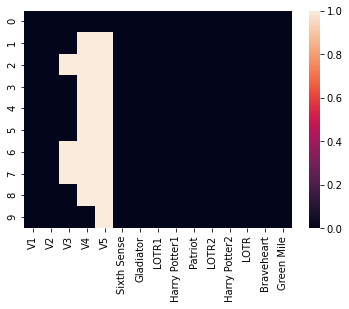

In [7]:
sns.heatmap(df.isnull())

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [12]:
#imputation for null values
df['V3'] = df.fillna(df['V3'].mode())
df['V4'] = df.fillna(df['V4'].mode())
df['V5'] = df.fillna(df['V5'].mode())

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             10 non-null     object
 3   V4             10 non-null     object
 4   V5             10 non-null     object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


<AxesSubplot:>

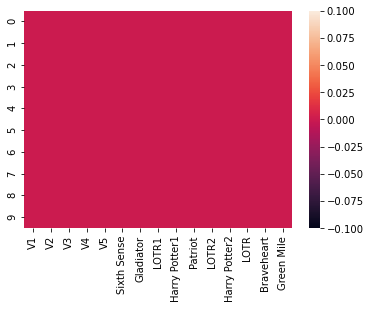

In [14]:
#visualize the data
sns.heatmap(df.isnull())


In [18]:
#pre processing the data
df1=pd.get_dummies(df)

In [15]:
#implementing apriori
from mlxtend.frequent_patterns import apriori,association_rules

In [19]:
#for min_support =0.2
frequent_items=apriori(df1,min_support=0.2,use_colnames=True)
frequent_items

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
316,0.4,"(Patriot, Gladiator, V4_Gladiator, V3_Gladiato..."
317,0.4,"(V1_Gladiator, Gladiator, V4_Gladiator, V3_Gla..."
318,0.4,"(V1_Gladiator, Patriot, V4_Gladiator, V3_Gladi..."
319,0.6,"(V1_Gladiator, Patriot, Gladiator, V4_Gladiato..."


In [23]:
#metric is confidence
df_1=association_rules(frequent_items,min_threshold=0.5,metric='confidence')
df_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
...,...,...,...,...,...,...,...,...,...
6618,(V4_Gladiator),"(V1_Gladiator, Patriot, Gladiator, V3_Gladiato...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
6619,(V3_Gladiator),"(V1_Gladiator, Patriot, Gladiator, V4_Gladiato...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
6620,(V2_Patriot),"(V1_Gladiator, Patriot, Gladiator, V4_Gladiato...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
6621,(V5_Gladiator),"(V1_Gladiator, Patriot, Gladiator, V4_Gladiato...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


In [29]:
 df_1[df_1.lift>4]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
31,(LOTR2),(LOTR1),0.2,0.2,0.2,1.0,5.0,0.16,inf
32,(LOTR1),(LOTR2),0.2,0.2,0.2,1.0,5.0,0.16,inf
43,(V1_Sixth Sense),(Green Mile),0.2,0.2,0.2,1.0,5.0,0.16,inf
44,(Green Mile),(V1_Sixth Sense),0.2,0.2,0.2,1.0,5.0,0.16,inf
45,(V3_Sixth Sense),(Green Mile),0.2,0.2,0.2,1.0,5.0,0.16,inf
...,...,...,...,...,...,...,...,...,...
4860,(V4_Sixth Sense),"(V1_Sixth Sense, Green Mile, V5_Sixth Sense, V...",0.2,0.2,0.2,1.0,5.0,0.16,inf
4861,(V1_Sixth Sense),"(V4_Sixth Sense, Green Mile, V5_Sixth Sense, V...",0.2,0.2,0.2,1.0,5.0,0.16,inf
4862,(Green Mile),"(V4_Sixth Sense, V1_Sixth Sense, V5_Sixth Sens...",0.2,0.2,0.2,1.0,5.0,0.16,inf
4863,(V5_Sixth Sense),"(V4_Sixth Sense, V1_Sixth Sense, Green Mile, V...",0.2,0.2,0.2,1.0,5.0,0.16,inf


<AxesSubplot:xlabel='lift', ylabel='Count'>

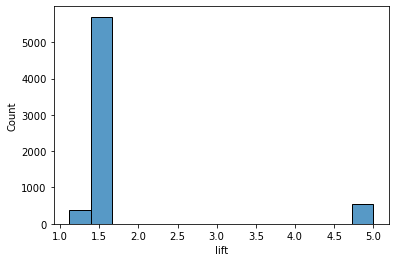

In [30]:
#visualization 
sns.histplot(x=df_1.lift)

In [ ]:
#All lift are greater than 1 which makes it a good rule

In [35]:
#Now for min_support = 0.5

frequent_items2=apriori(df1,min_support=0.5,use_colnames=True)
frequent_items2

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)
...,...,...
124,0.6,"(V1_Gladiator, Patriot, Gladiator, V4_Gladiato..."
125,0.6,"(Patriot, Gladiator, V4_Gladiator, V3_Gladiato..."
126,0.6,"(V1_Gladiator, Gladiator, V4_Gladiator, V3_Gla..."
127,0.6,"(V1_Gladiator, Patriot, V4_Gladiator, V3_Gladi..."


In [36]:
#association rule
df_2=association_rules(frequent_items2,min_threshold=0.5,metric='confidence')
df_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
3,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
4,(V1_Gladiator),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
...,...,...,...,...,...,...,...,...,...
1929,(Gladiator),"(V1_Gladiator, Patriot, V4_Gladiator, V3_Gladi...",0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
1930,(V4_Gladiator),"(V1_Gladiator, Gladiator, Patriot, V3_Gladiato...",0.6,0.6,0.6,1.000000,1.666667,0.24,inf
1931,(V3_Gladiator),"(V1_Gladiator, Gladiator, Patriot, V4_Gladiato...",0.6,0.6,0.6,1.000000,1.666667,0.24,inf
1932,(V2_Patriot),"(V1_Gladiator, Gladiator, Patriot, V4_Gladiato...",0.6,0.6,0.6,1.000000,1.666667,0.24,inf


<AxesSubplot:xlabel='lift', ylabel='Count'>

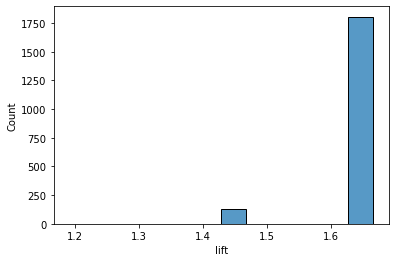

In [34]:
#visualization 
sns.histplot(x=df_2.lift)

In [ ]:
#Lift are greater than 1 so the rule is good